# TP 1 Reinforcment Learning

Remarques :

. Deux parties : dans la première on suppose qu'on connait le MDP et dans la deuxième on se base sur des données et on ne connaît pas le MPD.

. Suitable structures : pour $p(y,a,x)$ qu'il va falloir store , on peut $p_{1}(y,x)$ et $p_{2}(y,x)$

. Faire tout en vectoriel matrix form

. Faire un truc simple pour modéliser le growth du tree

. Lorsque le tree est malade et qu'on le coupe on prend un reward négatif car il ne va rien rapporter en bois

.tree_sim une étape et tree_MDP c'est le truc entier. 

### Modelisation

* L'arbre est modélisé par un entier entre 0 et H. (au début à zéro) c'est le state space.

* Action space : 0 ou 1 (cut ou pas cut)

* Reward :
    - Maintenance : reward -10
    - Unit of wood : reward 10
    - Cost of planting : reward -5
    
* Discount factor : $\gamma=\frac{1}{1+r}$ avec $r=0.05$



### Growth of tree

A chaque itération on a une proba 3/4 que l'arbre grandisse d'une unité.

Ensuite il peut tomber malade avec un probabilité 1/16.

Grandir de deux unités avec une proba de 1/16. 

Ne pas grandir avec une probabilité 1/8.

Si l'arbre est malade il ne peut pas grandir.

### Variables

a c'est l'action integer

r reward integer

state x just the tree de 0 à H.

In [1]:
import random as rd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [50]:
class Tree:
    
    def __init__(self,initSize,H,valueUnitOfWood=10,costOfPlanting=-5
                 ,costOfMaintenance=-10,probaOfSick=1/16,probaOfGrowTwice=1/16,probaOfNotGrow=2/16):
        self.size=initSize
        self.initSize=initSize
        self.Hmax=H
        self.valueUnitOfWood=valueUnitOfWood
        self.costOfPlanting=costOfPlanting
        self.costOfMaintenance=costOfMaintenance
        self.probaOfSick=probaOfSick
        self.probaOfGrowTwice=probaOfGrowTwice
        self.probaOfNotGrow=probaOfNotGrow
        self.probaOfGrowOne=1-(self.probaOfNotGrow+probaOfGrowTwice+probaOfSick)
    

 
    def tree_sim(self,x,a,verbose=0):
        
        reward=0
        
        if a==0 : # on coupe pas l'arbre
            choose=rd.random()

            # L'arbre tombe malade avec proba 1/16
            
            if choose<=(self.probaOfSick) :
                if verbose==1 :
                    print('The tree is getting sick')
                reward=self.costOfMaintenance
                x=1
              
            # L'arbre grandit de 2 avec proba 1/16
            
            if choose>self.probaOfSick and choose<=(self.probaOfSick+self.probaOfGrowTwice) :
                if verbose==1 :
                    print('The tree grows of two units')
                
                if x<self.Hmax:
                    x=x+2
                
                reward=self.costOfMaintenance
             
            # L'arbre ne grandit pas avec proba 1/8
            
            if choose>(self.probaOfSick+self.probaOfGrowTwice) and choose<=(self.probaOfSick+self.probaOfGrowTwice+self.probaOfNotGrow):
                if verbose==1 :
                    print('The tree does not grow')
                    
                reward=self.costOfMaintenance

            # L'arbre grandit d'une unité avec proba 3/4
            
            if choose>(self.probaOfSick+self.probaOfGrowTwice+self.probaOfNotGrow) and choose<=1 :
                if verbose==1 :
                    print('The tree grows of one unit')
                
                if x<self.Hmax:
                    x=x+1
                
                reward=self.costOfMaintenance

        if a==1 : # on coupe l'arbre et on en plante un autre de hauteur 1
            # on gagne la taille*la valeur de chaque bout de bois - le coût de la plantation
            reward=x*self.valueUnitOfWood+self.costOfPlanting 
            x=1
            
        
        return reward,x
        
    def tree_MDP(self,actions):
        
        rewards=[]
        treeSizes=[]
        
        if len(actions)==1:
            a=actions[0]
            sim=self.tree_sim(self.size,a)
            treeSizes=sim[1]
            rewards=sim[0]
            self.size=treeSizes
            
        if len(actions)>1:
            for a in actions:
                sim=self.tree_sim(self.size,a)
                x=sim[1]
                r=sim[0]
                self.size=x
                treeSizes.append(x)
                rewards.append(r)
            
        return rewards,treeSizes
    

        
    def plot_MDP(self,rewards,treeSizes,cumul=True):
            

        plt.figure(figsize=(20,10))

        plt.subplot(1,2,1)
        plt.plot(treeSizes,color='darkgreen',lw=3)
        plt.xlim([-1,len(rewards)])
        #plt.ylim([0,max(treeSizes)+1])
        plt.title('Simulation of a growing tree', fontsize=15)
        plt.ylabel('Tree\'s Height', fontsize=10)
        plt.xlabel('time', fontsize=10)
        #plt.yticks(range(max(treeSizes)))
       
        plt.subplot(1,2,2)
        plt.plot(rewards,'r-')
        if cumul==True:
            plt.plot(np.cumsum(rewards),'b--',lw=2)
        plt.title('Rewards', fontsize=15)
        plt.ylabel('Value of rewards', fontsize=10)
        plt.xlabel('time', fontsize=10)
        #plt.yticks(range(min(np.cumsum(rewards)),max(rewards),3))
        plt.legend(['Reward at each time','Cumulative sum of rewards'])

        plt.show()
        
   
    

### Simulation MDP tree

In [51]:
t=Tree(initSize=1,H=100)
actions=[0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0]
rewards,treeSizes=t.tree_MDP(actions)

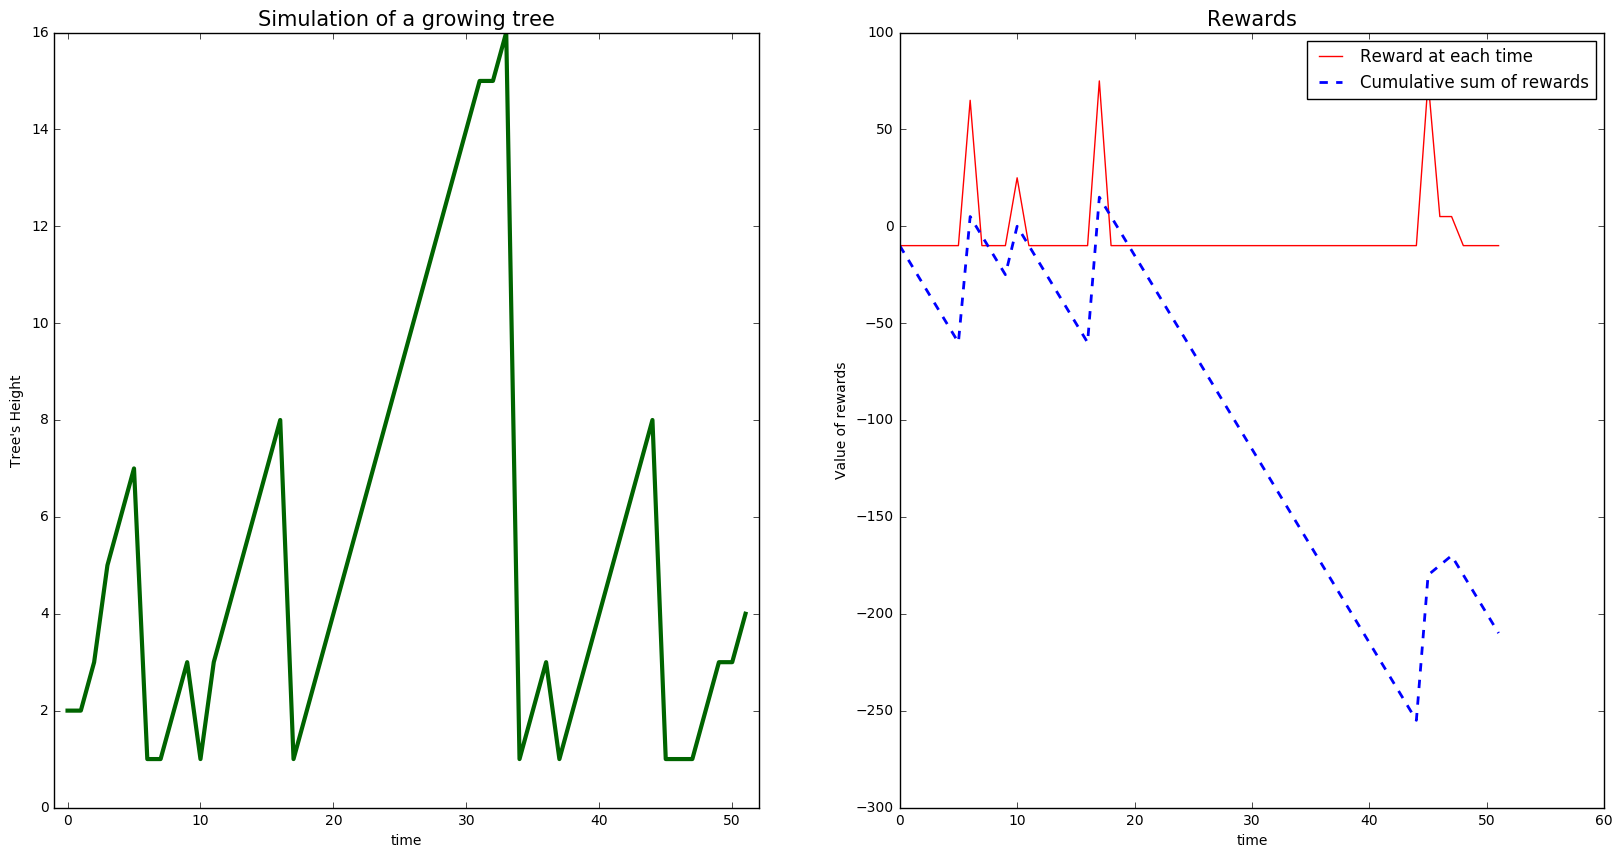

In [52]:
t.plot_MDP(rewards,treeSizes)

### Policy evaluation

In [5]:
class Agent :
        
    def policy(self,nIter,nbRuns,Tree):
        raise NotImplementedError("Dumb ass ! Please implement this method")
        

On implémente d'abord un agent stupide qui ne coupe jamais son arbre

In [53]:
class StupidAgent(Agent):
    
    def __init__(self):
        Agent.__init__(self)
    
    def policy(self,nIter,tree,nbRuns=1):
        rewards=np.zeros((nIter,nbRuns))
        treeSizes=np.zeros((nIter,nbRuns))
        probas=np.zeros((nIter,nbRuns))
        for run in range(nbRuns):
            t=Tree(initSize=tree.initSize
                ,costOfMaintenance=tree.costOfMaintenance
                ,costOfPlanting=tree.costOfPlanting
                ,H=tree.Hmax
                ,valueUnitOfWood=tree.valueUnitOfWood)
            actions=np.zeros(nIter)
            mdp=t.tree_MDP(actions)
            rewards[:,run]=mdp[0]
            treeSizes[:,run]=mdp[1]
        return np.mean(rewards,axis=1),np.mean(treeSizes,axis=1)
        
    def plot_policy(self,nIter,nbRuns,tree):
        rewards,treeSizes=self.policy(nIter=nIter,nbRuns=nbRuns,tree=tree)
        tree.plot_MDP(rewards,treeSizes)

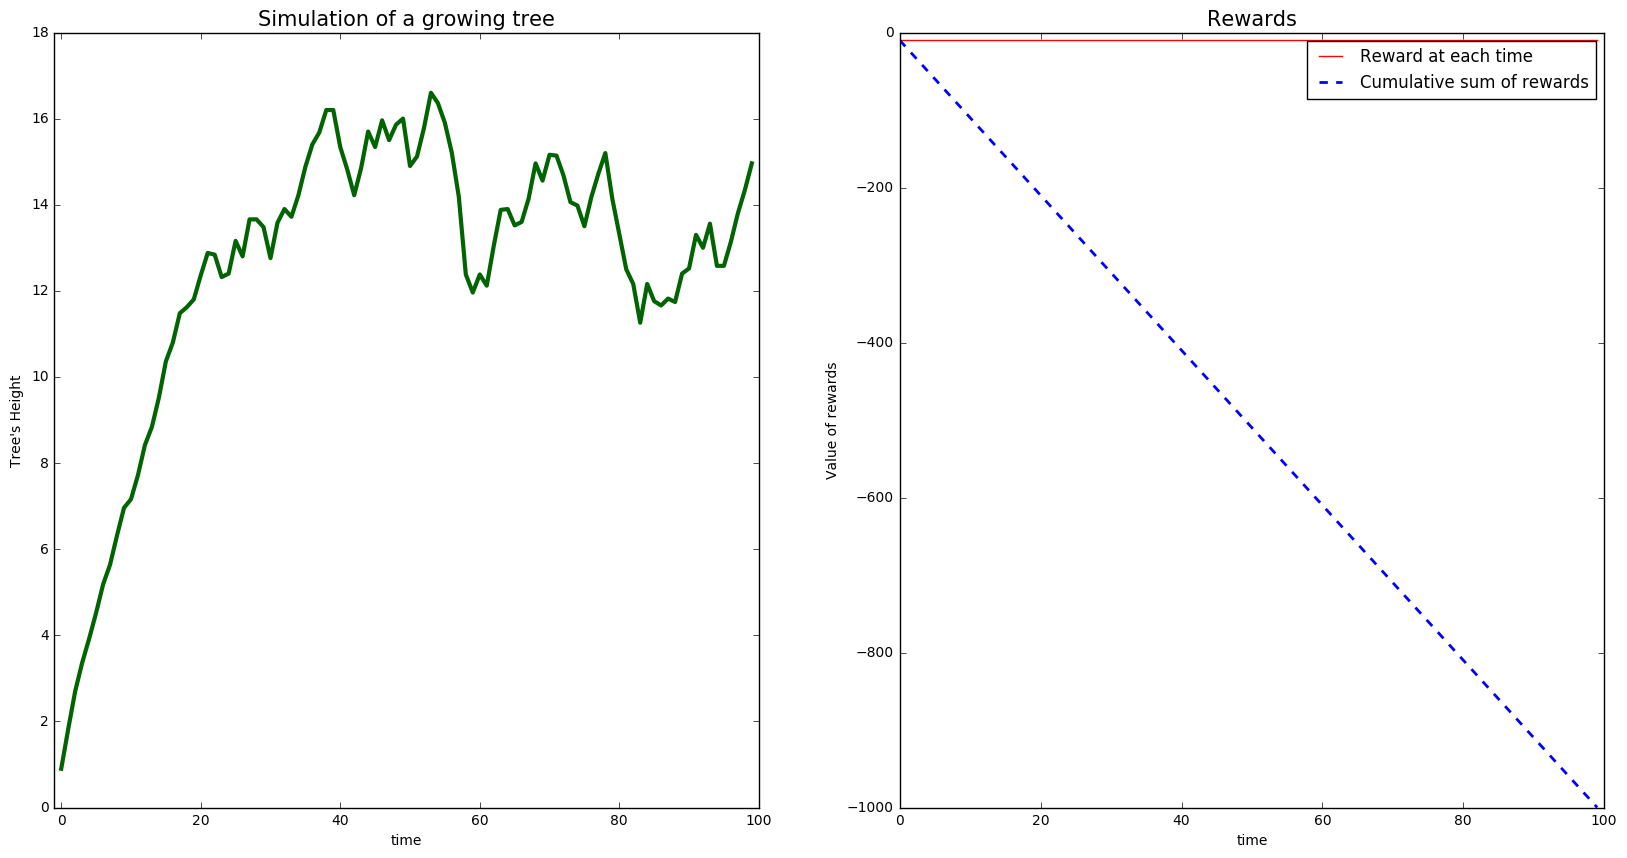

In [54]:
stdA=StupidAgent()
t=Tree(initSize=0,H=100)
stdA.plot_policy(nIter=100,tree=t,nbRuns=50)

Forcément le mec perd du pognon, on va définir un autre agent qui fait une action au pif à chaque fois.

In [55]:
class AbsurdAgent(Agent):
    
    def __init__(self):
        Agent.__init__(self)
    
    def policy(self,nIter,tree,nbRuns=1):
        rewards=np.zeros((nIter,nbRuns))
        treeSizes=np.zeros((nIter,nbRuns))
        probas=np.zeros((nIter,nbRuns))

        for run in range(nbRuns):
            t=Tree(initSize=tree.initSize
            ,costOfMaintenance=tree.costOfMaintenance
            ,costOfPlanting=tree.costOfPlanting
            ,H=tree.Hmax
            ,valueUnitOfWood=tree.valueUnitOfWood)
            
            actions=list(np.random.randint(2,size=nIter))
            rewards[:,run],treeSizes[:,run]=t.tree_MDP(actions)
                    
        return np.mean(rewards,axis=1),np.mean(treeSizes,axis=1)
        
    def plot_policy(self,nIter,nbRuns,tree):
        rewards,treeSizes=self.policy(nIter=nIter,nbRuns=nbRuns,tree=tree)
        tree.plot_MDP(rewards,treeSizes)

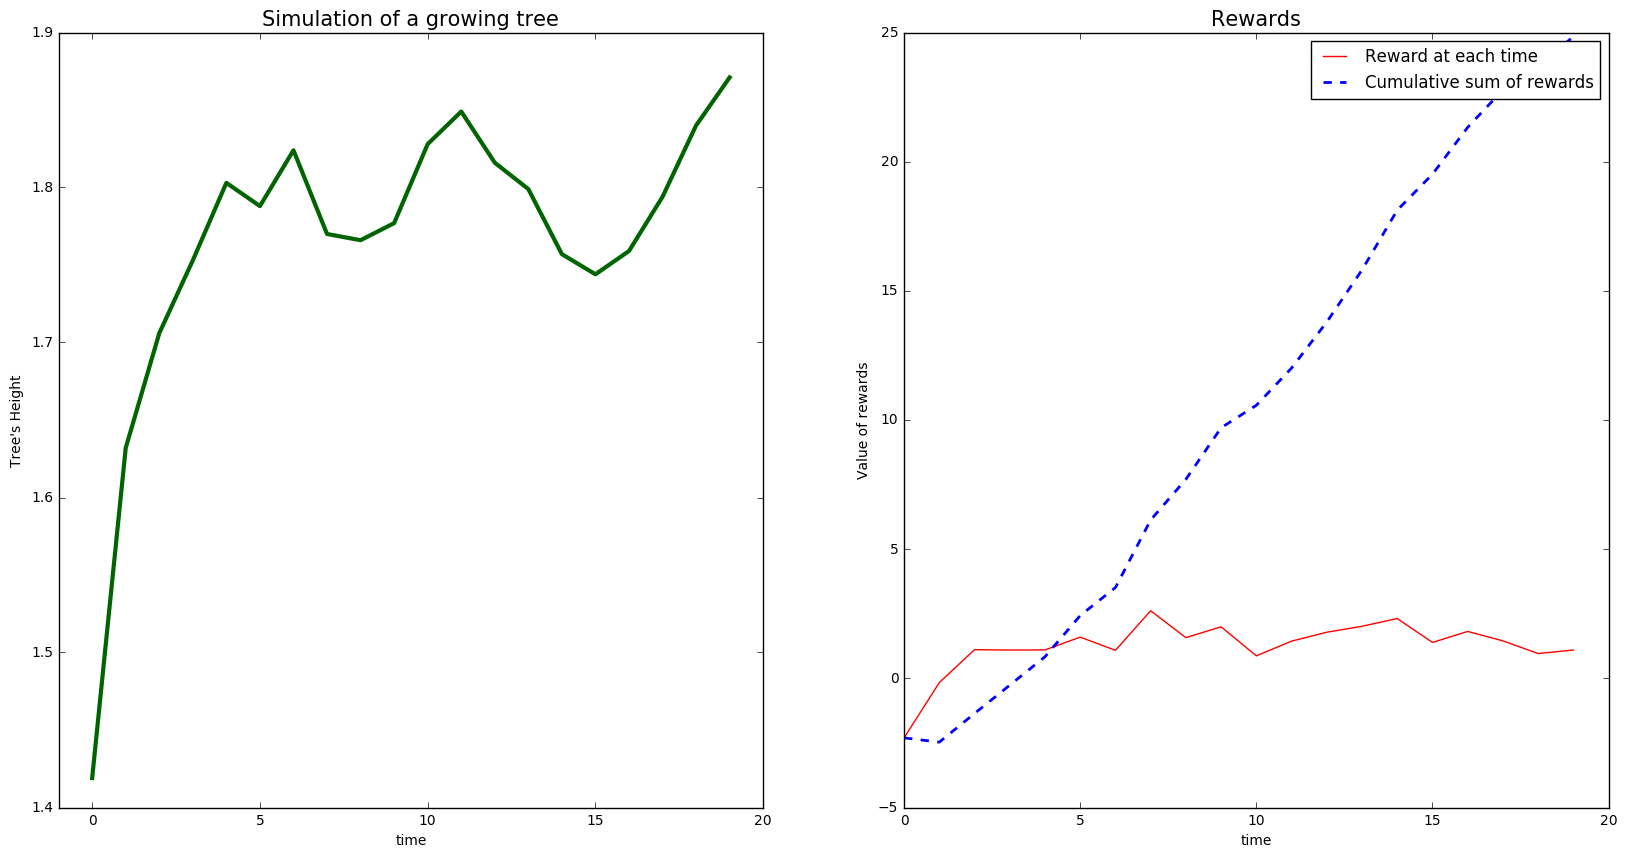

In [56]:
t=Tree(initSize=1,H=100)
absA=AbsurdAgent()
absA.plot_policy(nIter=20,nbRuns=1000,tree=t)

### Policy evaluation Dynamic (via belleman equation)

Via belleman equation et inversion 

$$ V= R+\gamma PV $$

$$ V=(I-\gamma P)^{-1}R $$

avec $P$ la matrice des proba

On a deux matrices 100*100, une quand on cut et une quand on cut pas 

In [57]:
meanPolicyValue=[]
t=Tree(initSize=1,H=100)
absA=AbsurdAgent()
agent=absA
r,x=agent.policy(nIter=100,tree=t)

In [389]:
class PolicyEvaluator:
    
    def __init__(self,agent,discount=1/1.05):
        self.agent=agent
        self.discount
        self.P
        
    def dynamic_evaluation(self,nIter,nTimes,tree):
        
        meanPolicyValue=[]
        for i in range(nTimes):
            r,x,p=self.agent.policy(nIter=nIter,tree=tree)
            sValue=r+
            
            
            
            
            
            
            